# Import Libraries

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
from scipy import stats
from sklearn.model_selection import train_test_split

import nltk
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import warnings 
warnings.filterwarnings("ignore")

import re

# Import Data
- The data has over 3900 English tweets from the past 7 days of the current 10 teams.
- The 10 teams are: 
    1. Ferrari
    2. Mercedes
    3. Redbull
    4. Haas
    5. Mclaren
    6. Alpine
    7. Williams
    8. Aston Martin
    9. Alpha Tauri
    10. Alfa Romeo
- The data is also cleaned to an extent by removing punctuations in the previous sections when sentiments of these tweets were extracted.

In [129]:
df = pd.read_csv('../../data/01-modified-data/all_teams_sentiment_df.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

Team                                                  0  \
0  Ferrari  *female f1 fans reposting shirtless driver pic...   
1  Ferrari  Watch a video explaining Ferrari's development...   
2  Ferrari  [Race Fans]\nFerrari engine’s driveability is ...   
3  Ferrari  Ferrari boss Binotto set for talks with Schuma...   
4  Ferrari  Leclerc: F1 world championship drought not pre...   

                                                text  polarity  subjectivity  \
0  female f fans reposting shirtless driver pics ...      0.04      0.673333   
1  watch a video explaining ferraris development ...      0.35      0.550000   
2  race fans\nferrari engine’s driveability is bi...      0.00      0.000000   
3  ferrari boss binotto set for talks with schuma...      0.00      0.125000   
4  leclerc f world championship drought not press...      0.00      0.000000   

  sentiment                                          tokenized  \
0  positive  ['female', 'f', 'fans', 'reposting', 'shirtles...   
1   neutral  ['watch', 'a', 'video', 'explaining', 'ferrari...   
2   neutral  ['race', 'fans', 'ferrari', 'engine', 's', 'dr...   
3   neutral  ['ferrari', 'boss', 'binotto', 'set', 'for', '...   
4  positive  ['leclerc', 'f', 'world', 'championship', 'dro...   

                                             nonstop  \
0  ['female', 'f', 'fans', 'reposting', 'shirtles...   
1  ['watch', 'video', 'explaining', 'ferraris', '...   
2  ['race', 'fans', 'ferrari', 'engine', 'driveab...   
3  ['ferrari', 'boss', 'binotto', 'set', 'talks',...   
4  ['leclerc', 'f', 'world', 'championship', 'dro...   

                                             stemmed  
0  ['femal', 'f', 'fan', 'repost', 'shirtless', '...  
1  ['watch', 'video', 'explain', 'ferrari', 'deve...  
2  ['race', 'fan', 'ferrari', 'engin', 'driveabl'...  
3  ['ferrari', 'boss', 'binotto', 'set', 'talk', ...  
4  ['leclerc', 'f', 'world', 'championship', 'dro...

# Data Pre-Processing and Visualization
- While cleaning tweets previously, numbers were also removed which in turn converted "f1" to "f". I rectified those mistakes by replacing "f" with "f1". 
- Further, all the newline characters were replaced by spaces by the use of regex library. Lastly, all commas, brackets and apostrophes were also removed.
- Distribution of labels were also visualization to check if any downsampling needs to be performed.
- The label column was converted to numerical values by mapping each team to a number.


In [130]:
df = df[['Team', 'text']]
df.head(10)

Team                                               text
0  Ferrari  female f fans reposting shirtless driver pics ...
1  Ferrari  watch a video explaining ferraris development ...
2  Ferrari  race fans\nferrari engine’s driveability is bi...
3  Ferrari  ferrari boss binotto set for talks with schuma...
4  Ferrari  leclerc f world championship drought not press...
5  Ferrari  shop now charles leclerc ferrari  f tshirt   d...
6  Ferrari  leclerc f world championship drought not press...
7  Ferrari  new racefans roundup  ferrari engine’s driveab...
8  Ferrari                        fhistoria but ferrari drive
9  Ferrari  fsofi as a ferrari fan my only plans for the w...

In [131]:
for i in range(len(df)):
    
    df['text'][i] = df['text'][i].replace(" f ", " f1 ")
    df['text'][i] = re.sub('\n', ' ', df['text'][i])
    df['text'][i].replace(",","").replace("[","").replace("]","").replace("'","")
    
df.head()

Team                                               text
0  Ferrari  female f1 fans reposting shirtless driver pics...
1  Ferrari  watch a video explaining ferraris development ...
2  Ferrari  race fans ferrari engine’s driveability is big...
3  Ferrari  ferrari boss binotto set for talks with schuma...
4  Ferrari  leclerc f1 world championship drought not pres...

[Text(0, 0, 'Williams'),
 Text(1, 0, 'Mclaren'),
 Text(2, 0, 'Mercedes'),
 Text(3, 0, 'Alpine'),
 Text(4, 0, 'Ferrari'),
 Text(5, 0, 'Haas'),
 Text(6, 0, 'Redbull'),
 Text(7, 0, 'Aston Martin'),
 Text(8, 0, 'Alfa Romeo'),
 Text(9, 0, 'Alpha Tauri')]

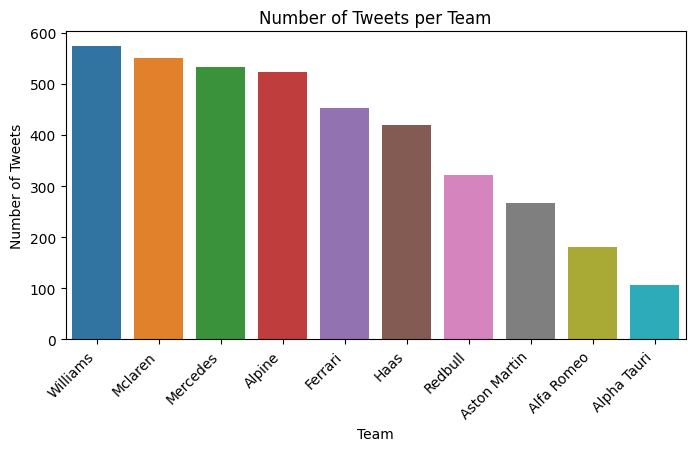

In [132]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(x = df['Team'].value_counts().index, y = df['Team'].value_counts().values, ax=ax)

ax.set_xlabel('Team')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Team')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

The distribution of tweets as can be seen is not uniform but the difference in minimum and maximum number of tweets per team is not too high hence no downsampling is performed. 

In [133]:
X = df['text']
y = df['Team']

In [134]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([4, 4, 4, ..., 0, 0, 0])

In [135]:
teams = ['Ferrari', 'Mercedes', 'Redbull', 'Haas', 'Mclaren', 'Alpine', 'Williams', 'Aston Martin', 'Alpha Tauri', 'Alfa Romeo']
y1 = labelencoder.fit(teams)
label_map = dict(zip(y1.classes_, y1.transform(y1.classes_)))
label_map

{'Alfa Romeo': 0,
 'Alpha Tauri': 1,
 'Alpine': 2,
 'Aston Martin': 3,
 'Ferrari': 4,
 'Haas': 5,
 'Mclaren': 6,
 'Mercedes': 7,
 'Redbull': 8,
 'Williams': 9}

In [136]:
label_list = list(label_map.keys())

# Decision Tree Model

- The data which comes from e-commerce site is unstructured text data. Text mining is becoming an important field in research for finding valuable information from unstructured texts. Data which contains an unstructured text which stores large volume of valuable information cannot exclusively be used for any process by computers.
- Decision tree builds classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. Decision Trees usually implement exactly the human thinking ability while making a decision, so it is easy to understand.
- The logic behind the decision tree can be easily understood because it shows a flow chart type structure /tree-like structure which makes it easy to visualize and extract information out of the background process.
- While building a Decision tree, the main thing is to select the best attribute from the total features list of the dataset for the root node as well as for sub-nodes. The selection of best attributes is being achieved with the help of a technique known as the Attribute selection measure (ASM). There are two techniques for ASM:
    1. Information Gain (Entropy) - It is the measurement of changes in entropy value after the splitting/segmentation of the dataset based on an attribute.
    2. Gini Impurity - It is defined as a measure of impurity/ purity used while creating a decision tree in the CART(known as Classification and Regression Tree) algorithm.
- The basic idea behind any decision tree algorithm is as follows:
    1. Select the best Feature using Attribute Selection Measures(ASM) to split the records.
    2. Make that attribute/feature a decision node and break the dataset into smaller subsets.
    3. Start the tree-building process by repeating this process recursively for each child until one of the following condition is being achieved :
        - All tuples belonging to the same attribute value.
        - There are no more of the attributes remaining.
        - There are no more instances remaining.

## Data Preparation

- `Count Vectorizer`: It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis). CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

- The data is first split into train and test with a split ratio of 80(train) - 20(test). The tweets are then transformed to number vectors using sklearn CountVectorizer function.

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [138]:
vectorizer = CountVectorizer()
X_train1 = vectorizer.fit_transform(X_train.astype('U')) 
X_test1 = vectorizer.transform(X_test.astype('U'))

## Decision Trees with random Hyperparameters

### Decision Tree 1

Hyperparameters: <br>
- Criterion: Entropy <br>
- Splitter: Best <br>
- Maximum depth of the decision tree: 4

In [139]:
dt1 = DecisionTreeClassifier(random_state=1973,criterion = "entropy", splitter = "best", max_depth = 4)
dt1.fit(X_train1, y_train)
y_pred = dt1.predict(X_test1)
Classification_report_1 = classification_report(y_test, y_pred)
conf_matrix_1 = confusion_matrix(y_test, y_pred)

Decision Tree 1 Plot after fitting:

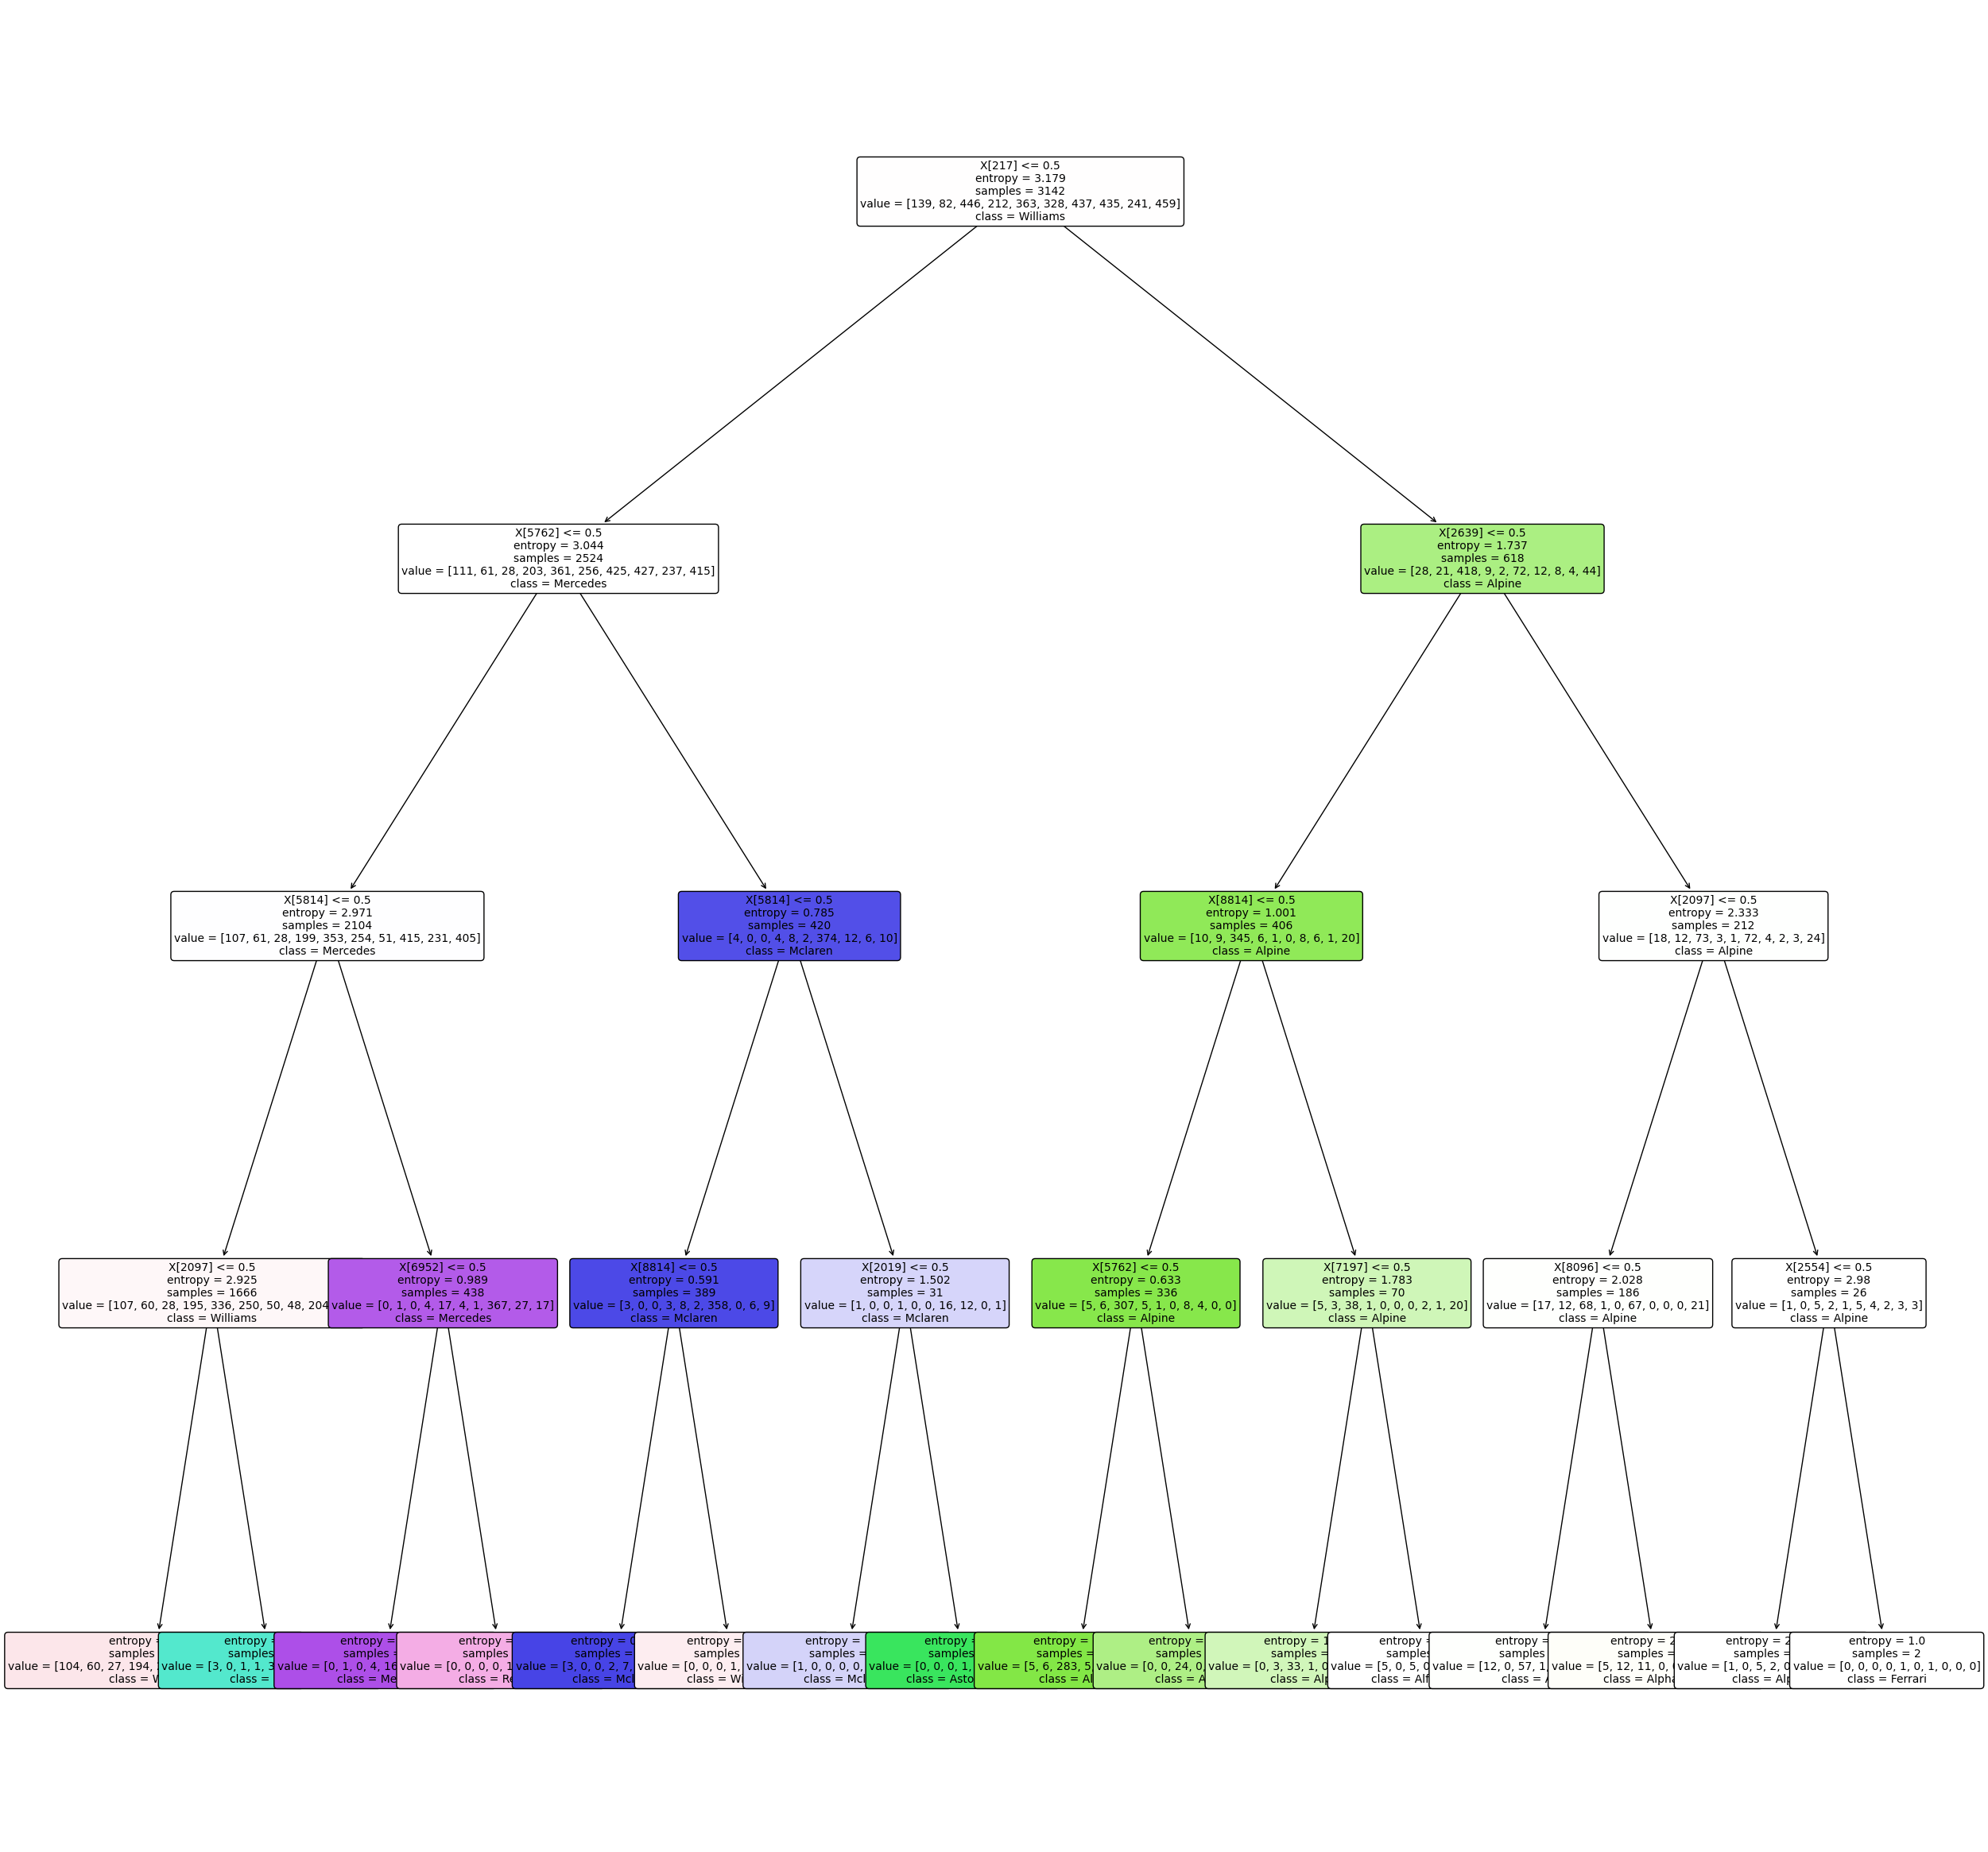

In [140]:
plt.figure(figsize = (30,30))
dec_tree_1 = plot_tree(decision_tree=dt1, class_names=label_list, filled=True, rounded=True, fontsize=10, max_depth=4)

Classification Report for Decision Tree 1:

Accuracy 0.5381679389312977
              precision    recall  f1-score   support

           0       0.50      0.02      0.05        41
           1       0.16      0.12      0.14        24
           2       0.61      0.87      0.72        77
           3       0.00      0.00      0.00        55
           4       0.87      0.83      0.85        90
           5       0.00      0.00      0.00        91
           6       0.87      0.85      0.86       113
           7       0.90      0.77      0.83        99
           8       0.60      0.11      0.19        81
           9       0.27      0.83      0.40       115

    accuracy                           0.54       786
   macro avg       0.48      0.44      0.40       786
weighted avg       0.53      0.54      0.48       786



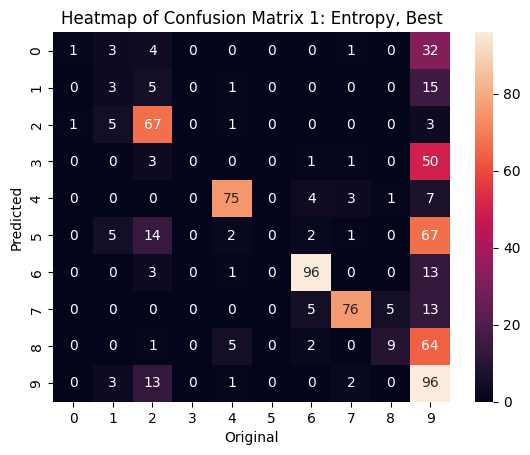

In [141]:
#Confusion matrix seaborn
sns.heatmap(conf_matrix_1,annot=True)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Heatmap of Confusion Matrix 1: Entropy, Best')
#plt.savefig('Confusion_Matrix1.png')

#Accuracy
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Inference from Decision Tree 1: <br>
- There are lot of mis-classifications for 6 out of 10 Teams (classes).<br>
- Teams such as Alpine, Ferrari, Mclaren and Mercedes are getting classified with a high F1 score.<br>
- A majority of tweets are classified into label 9 (Williams). One of the reasons can be since the samples of Williams are higher than other classes.<br>

### Decision Tree 2
Hyperparameters:<br>
- Criterion: Gini Impurity<br>
- Splitter: Random<br>
- Maximum depth of the decision tree: 5<br>


In [142]:
dt2 = DecisionTreeClassifier(random_state=10,criterion = "gini", splitter = "random",max_depth = 5)
dt2.fit(X_train1, y_train)
y_pred = dt2.predict(X_test1)
Classification_report_2 = classification_report(y_test, y_pred)
conf_matrix_2 = confusion_matrix(y_test, y_pred)

Decision Tree 2 Plot after fitting:

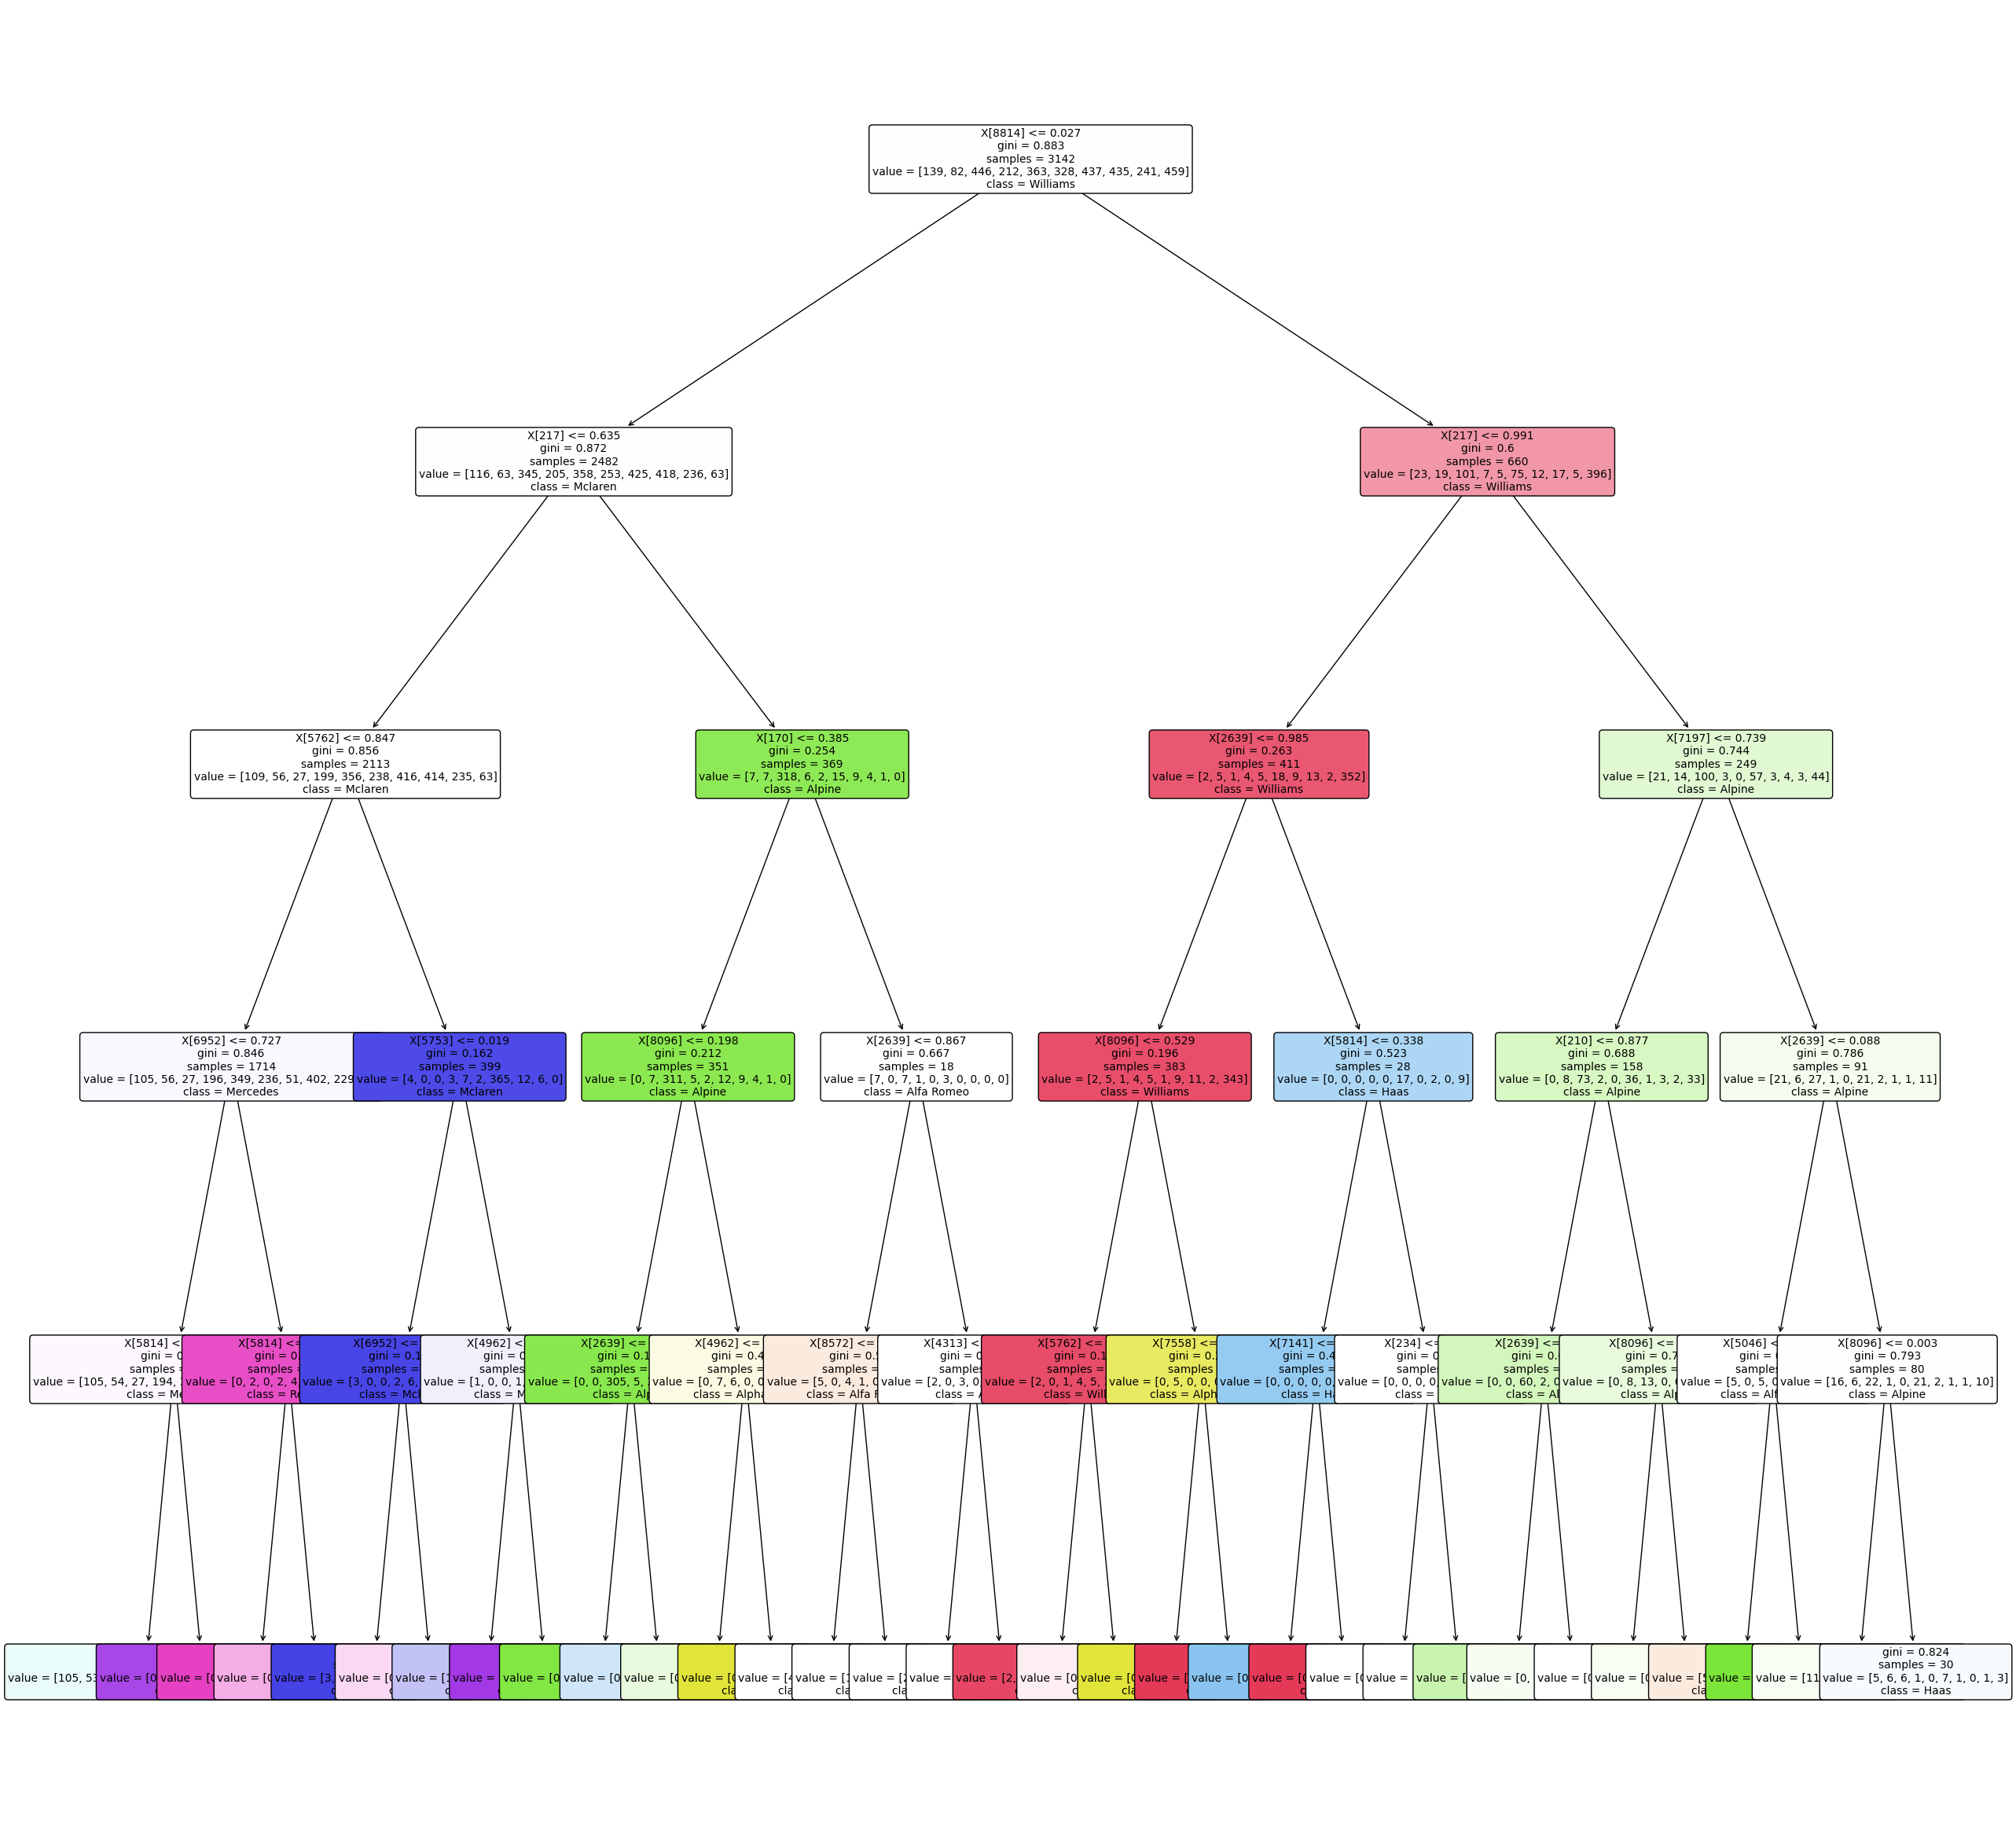

In [143]:
plt.figure(figsize = (30,30))
dec_tree_2 = plot_tree(decision_tree=dt2, class_names=label_list, filled=True, rounded=True, fontsize=10, max_depth=5)

Classification Report for Decision Tree 2:

Accuracy 0.5928753180661578
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        24
           2       0.59      0.84      0.70        77
           3       0.00      0.00      0.00        55
           4       0.28      0.89      0.42        90
           5       0.20      0.05      0.09        91
           6       0.88      0.82      0.85       113
           7       0.89      0.75      0.81        99
           8       0.87      0.89      0.88        81
           9       0.88      0.67      0.76       115

    accuracy                           0.59       786
   macro avg       0.46      0.49      0.45       786
weighted avg       0.57      0.59      0.55       786



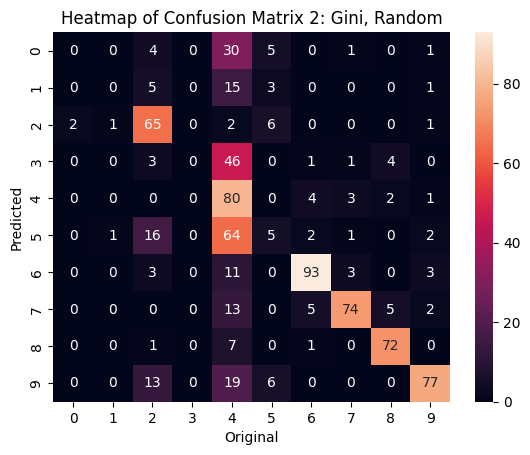

In [144]:
#Confusion matrix seaborn
sns.heatmap(conf_matrix_2,annot=True)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Heatmap of Confusion Matrix 2: Gini, Random')
#plt.savefig('Confusion_Matrix2.png')

#Accuracy
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Inference from Decision Tree 2: <br>
- There are lot of mis-classifications for 5 out of 10 Teams (classes).<br>
- Teams such as Alpine, Mclaren, Mercedes, Redbull and Williams are getting classified with a high F1 score.<br>
- A majority of tweets are classified into label 4 (Ferrari).<br>
- As I increased our maximum depth by 1, we can see a significant change in the classification for Williams label as well as for some other classes.<br>

### Decision Tree 3
Hyperparameters:
- Criterion: Entropy
- Splitter: Random
- Maximum depth of the decision tree: 4


In [145]:
dt3 = DecisionTreeClassifier(random_state=0,criterion = "entropy", splitter = "random",max_depth = 4)
dt3.fit(X_train1, y_train)
y_pred = dt3.predict(X_test1)
Classification_report_3 = classification_report(y_test, y_pred)
conf_matrix_3 = confusion_matrix(y_test, y_pred)

Decision Tree 3 Plot after fitting:

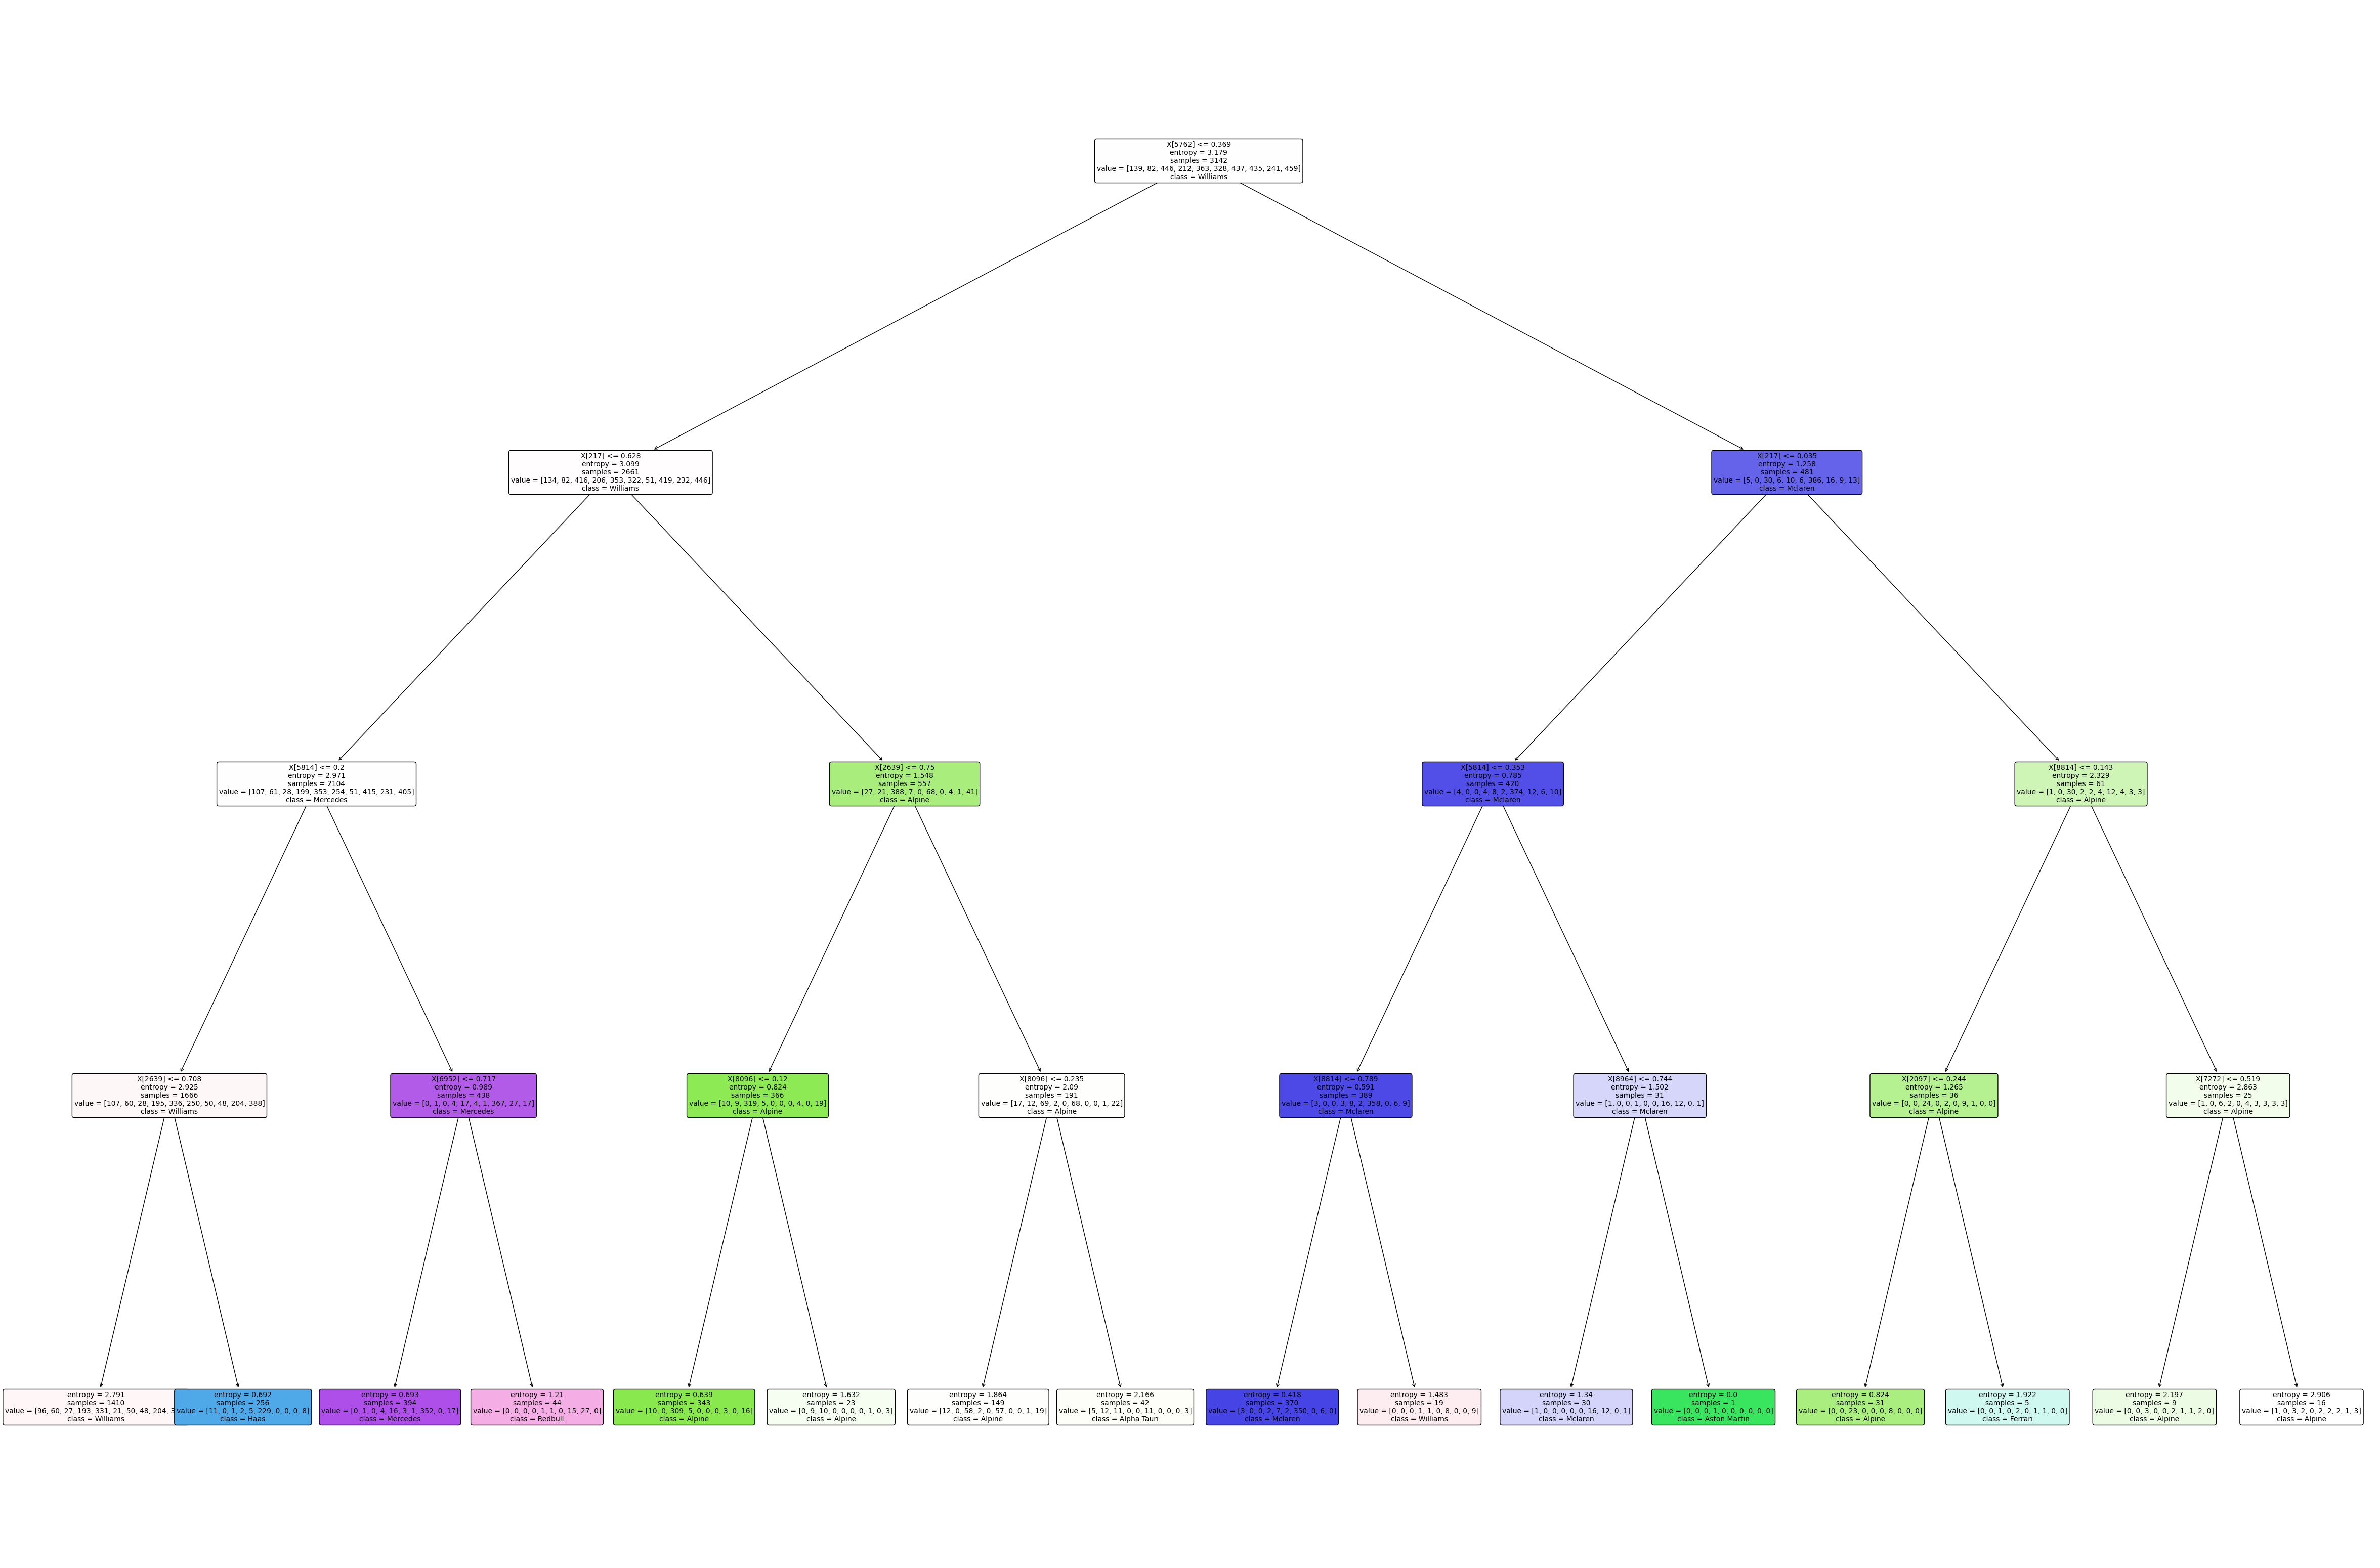

In [146]:
plt.figure(figsize = (60,40))
dec_tree_3 = plot_tree(decision_tree=dt3, class_names=label_list, filled=True, rounded=True, fontsize=10, max_depth=4)

Classification Report for Decision Tree 3:

Accuracy 0.5190839694656488
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.16      0.12      0.14        24
           2       0.61      0.87      0.72        77
           3       0.00      0.00      0.00        55
           4       0.00      0.00      0.00        90
           5       0.88      0.69      0.77        91
           6       0.87      0.85      0.86       113
           7       0.90      0.77      0.83        99
           8       0.60      0.11      0.19        81
           9       0.25      0.82      0.39       115

    accuracy                           0.52       786
   macro avg       0.43      0.42      0.39       786
weighted avg       0.50      0.52      0.47       786



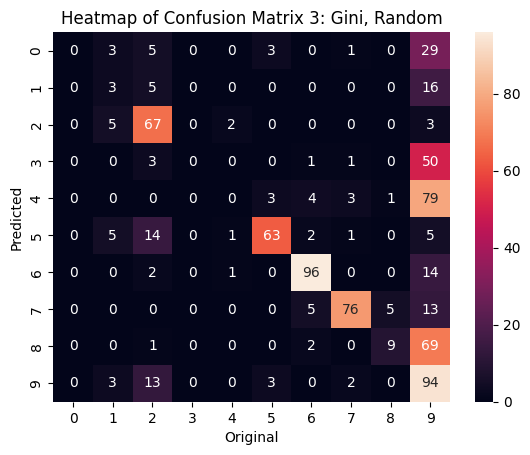

In [147]:
#Confusion matrix seaborn
sns.heatmap(conf_matrix_3,annot=True)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Heatmap of Confusion Matrix 3: Gini, Random')
#plt.savefig('Confusion_Matrix3.png')

#Accuracy
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Inference from Decision Tree 3: 
- There are lot of mis-classifications for 6 out of 10 Teams (classes).<br>
- Teams such as Alpine, Haas, Mclaren and Mercedes are getting classified with a high F1 score.<br>
- A majority of tweets are classified into label 9 (Williams).<br>
- Comparing with Decision tree 1, after changing our splitter to random from best our accuracy has decreased so the splitter that was chosen earlier in the first tree is more suitable.<br>

## Hyperparameter Tuning
- Since the accuracy scores of the Decision tree models with random hyperparameters were not up to the mark we have to tune our hyperparameters accordingly.
- From above random models, it is concluded that even if Entropy performs better feature selection, the difference is less when we compare to Gini Impurity. This is not the case for computational time, which is higher when we take Entropy as our criterion.
- It is also observed that increasing the depth of the decision tree leads to better results but it also increases the complexity of the model and thus may lead to overfitting. Hence we need to find an optimal depth for our decision tree model.
- This can be achieved by iterating with the help of loops over depth ranging from 0-20 and finding the accuracy and recall for all the depths.

In [148]:
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train1, y_train)

    yp_train=model.predict(X_train1)
    yp_test=model.predict(X_test1)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0, average='micro'),recall_score(y_test, yp_test,pos_label=1, average='micro'),
                         recall_score(y_test, yp_test,pos_label=2, average='micro'),recall_score(y_test, yp_test,pos_label=3, average='micro'),
                         recall_score(y_test, yp_test,pos_label=4, average='micro'),recall_score(y_test, yp_test,pos_label=5, average='micro'),
                         recall_score(y_test, yp_test,pos_label=6, average='micro'),recall_score(y_test, yp_test,pos_label=7, average='micro'),
                         recall_score(y_test, yp_test,pos_label=8, average='micro'),recall_score(y_test, yp_test,pos_label=9, average='micro')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0, average='micro'),recall_score(y_train, yp_train,pos_label=1, average='micro'),
                          recall_score(y_train, yp_train,pos_label=2, average='micro'),recall_score(y_train, yp_train,pos_label=3, average='micro'),
                          recall_score(y_train, yp_train,pos_label=4, average='micro'),recall_score(y_train, yp_train,pos_label=5, average='micro'),
                          recall_score(y_train, yp_train,pos_label=6, average='micro'),recall_score(y_train, yp_train,pos_label=7, average='micro'),
                          recall_score(y_train, yp_train,pos_label=8, average='micro'),recall_score(y_train, yp_train,pos_label=9, average='micro')])

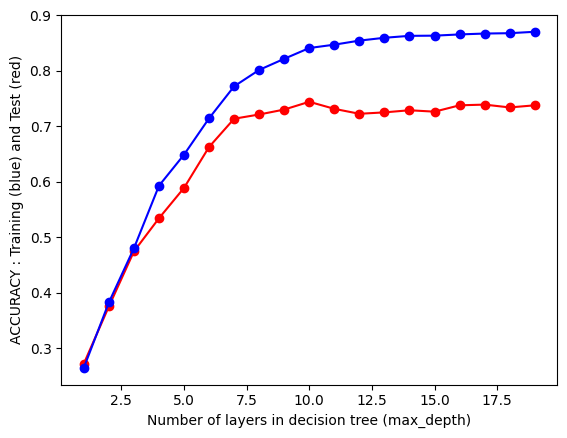

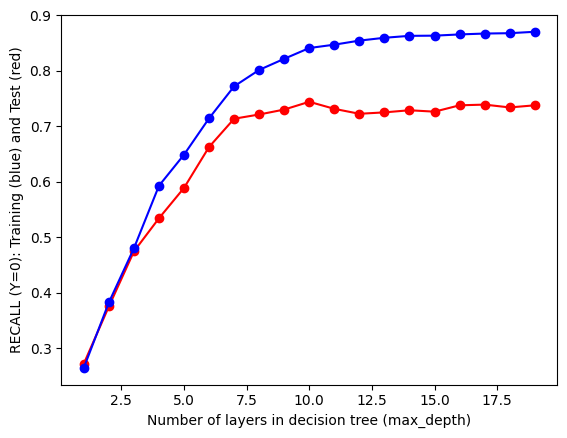

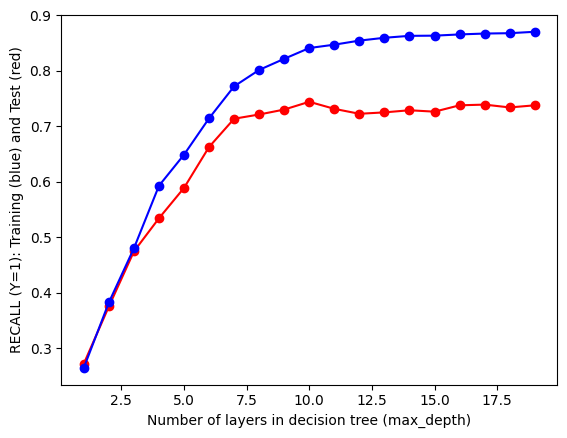

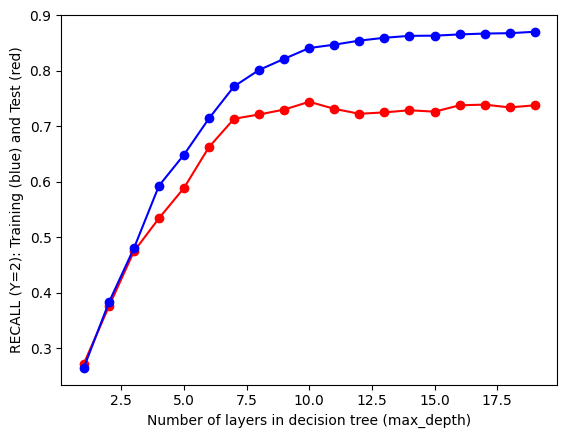

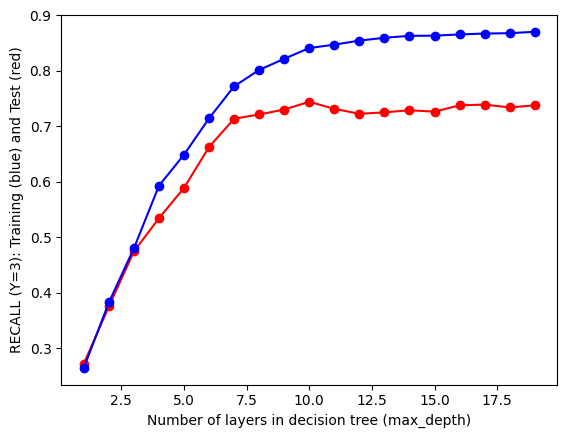

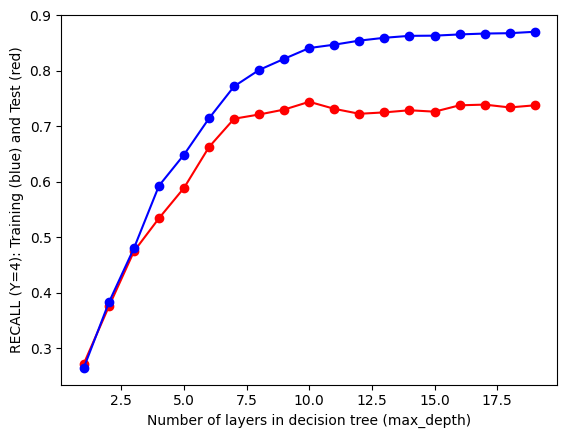

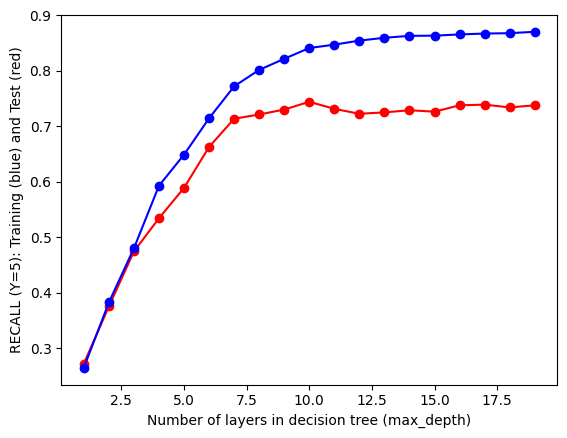

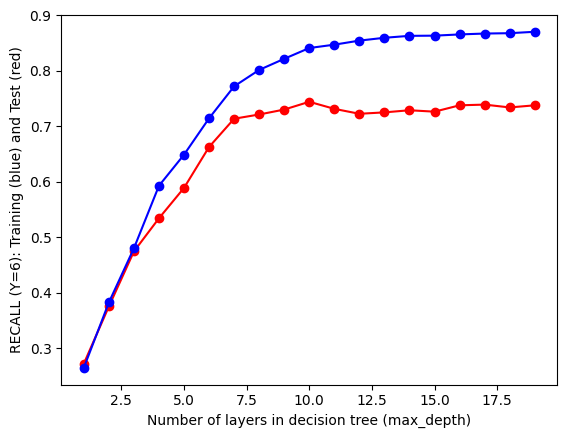

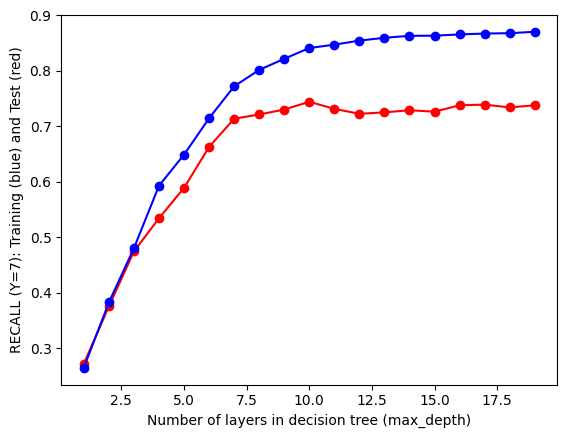

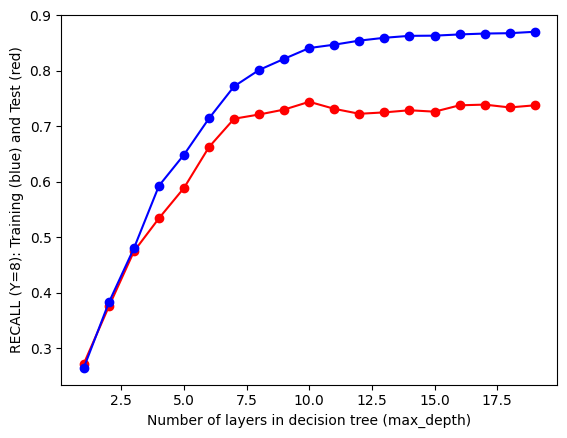

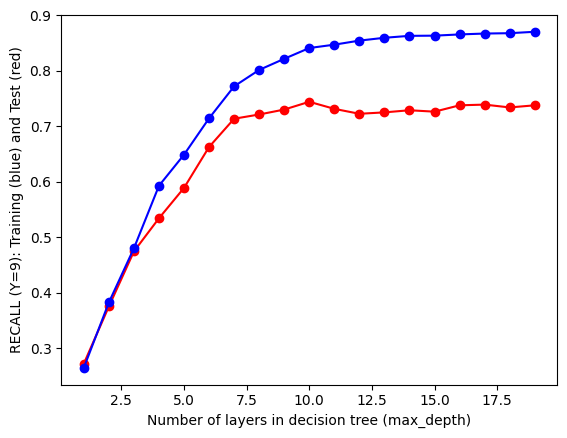

In [149]:
plt.plot([x[0] for x in test_results],[x[1] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[1] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('ACCURACY : Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[2] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[2] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=0): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[3] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[3] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=1): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[4] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[4] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=2): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[5] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[5] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=3): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[6] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[6] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=4): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[7] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[7] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=5): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[8] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[8] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=6): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[9] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[9] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=7): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[10] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[10] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=8): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[11] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[11] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=9): Training (blue) and Test (red)')
plt.show()

Inference for Hyperparameter tuning<br>
- As the depth increases, the accuracy and recall scores are increasing.<br>
- The accuracy and recall scores of test data reach their maximum at max_depth value = 10.<br>
- The accuracy and recall scores of train data keep on increasing as the depth increases.<br>
- Hence I choose my optimal max_depth value as 10.<br>

## Optimal Decision Tree


In [150]:
optimal_dt = DecisionTreeClassifier(random_state=1973, max_depth = 10, criterion = 'gini')
optimal_dt.fit(X_train1, y_train)
y_pred = optimal_dt.predict(X_test1)
Classification_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

Optimal Decision Tree Plot after fitting:

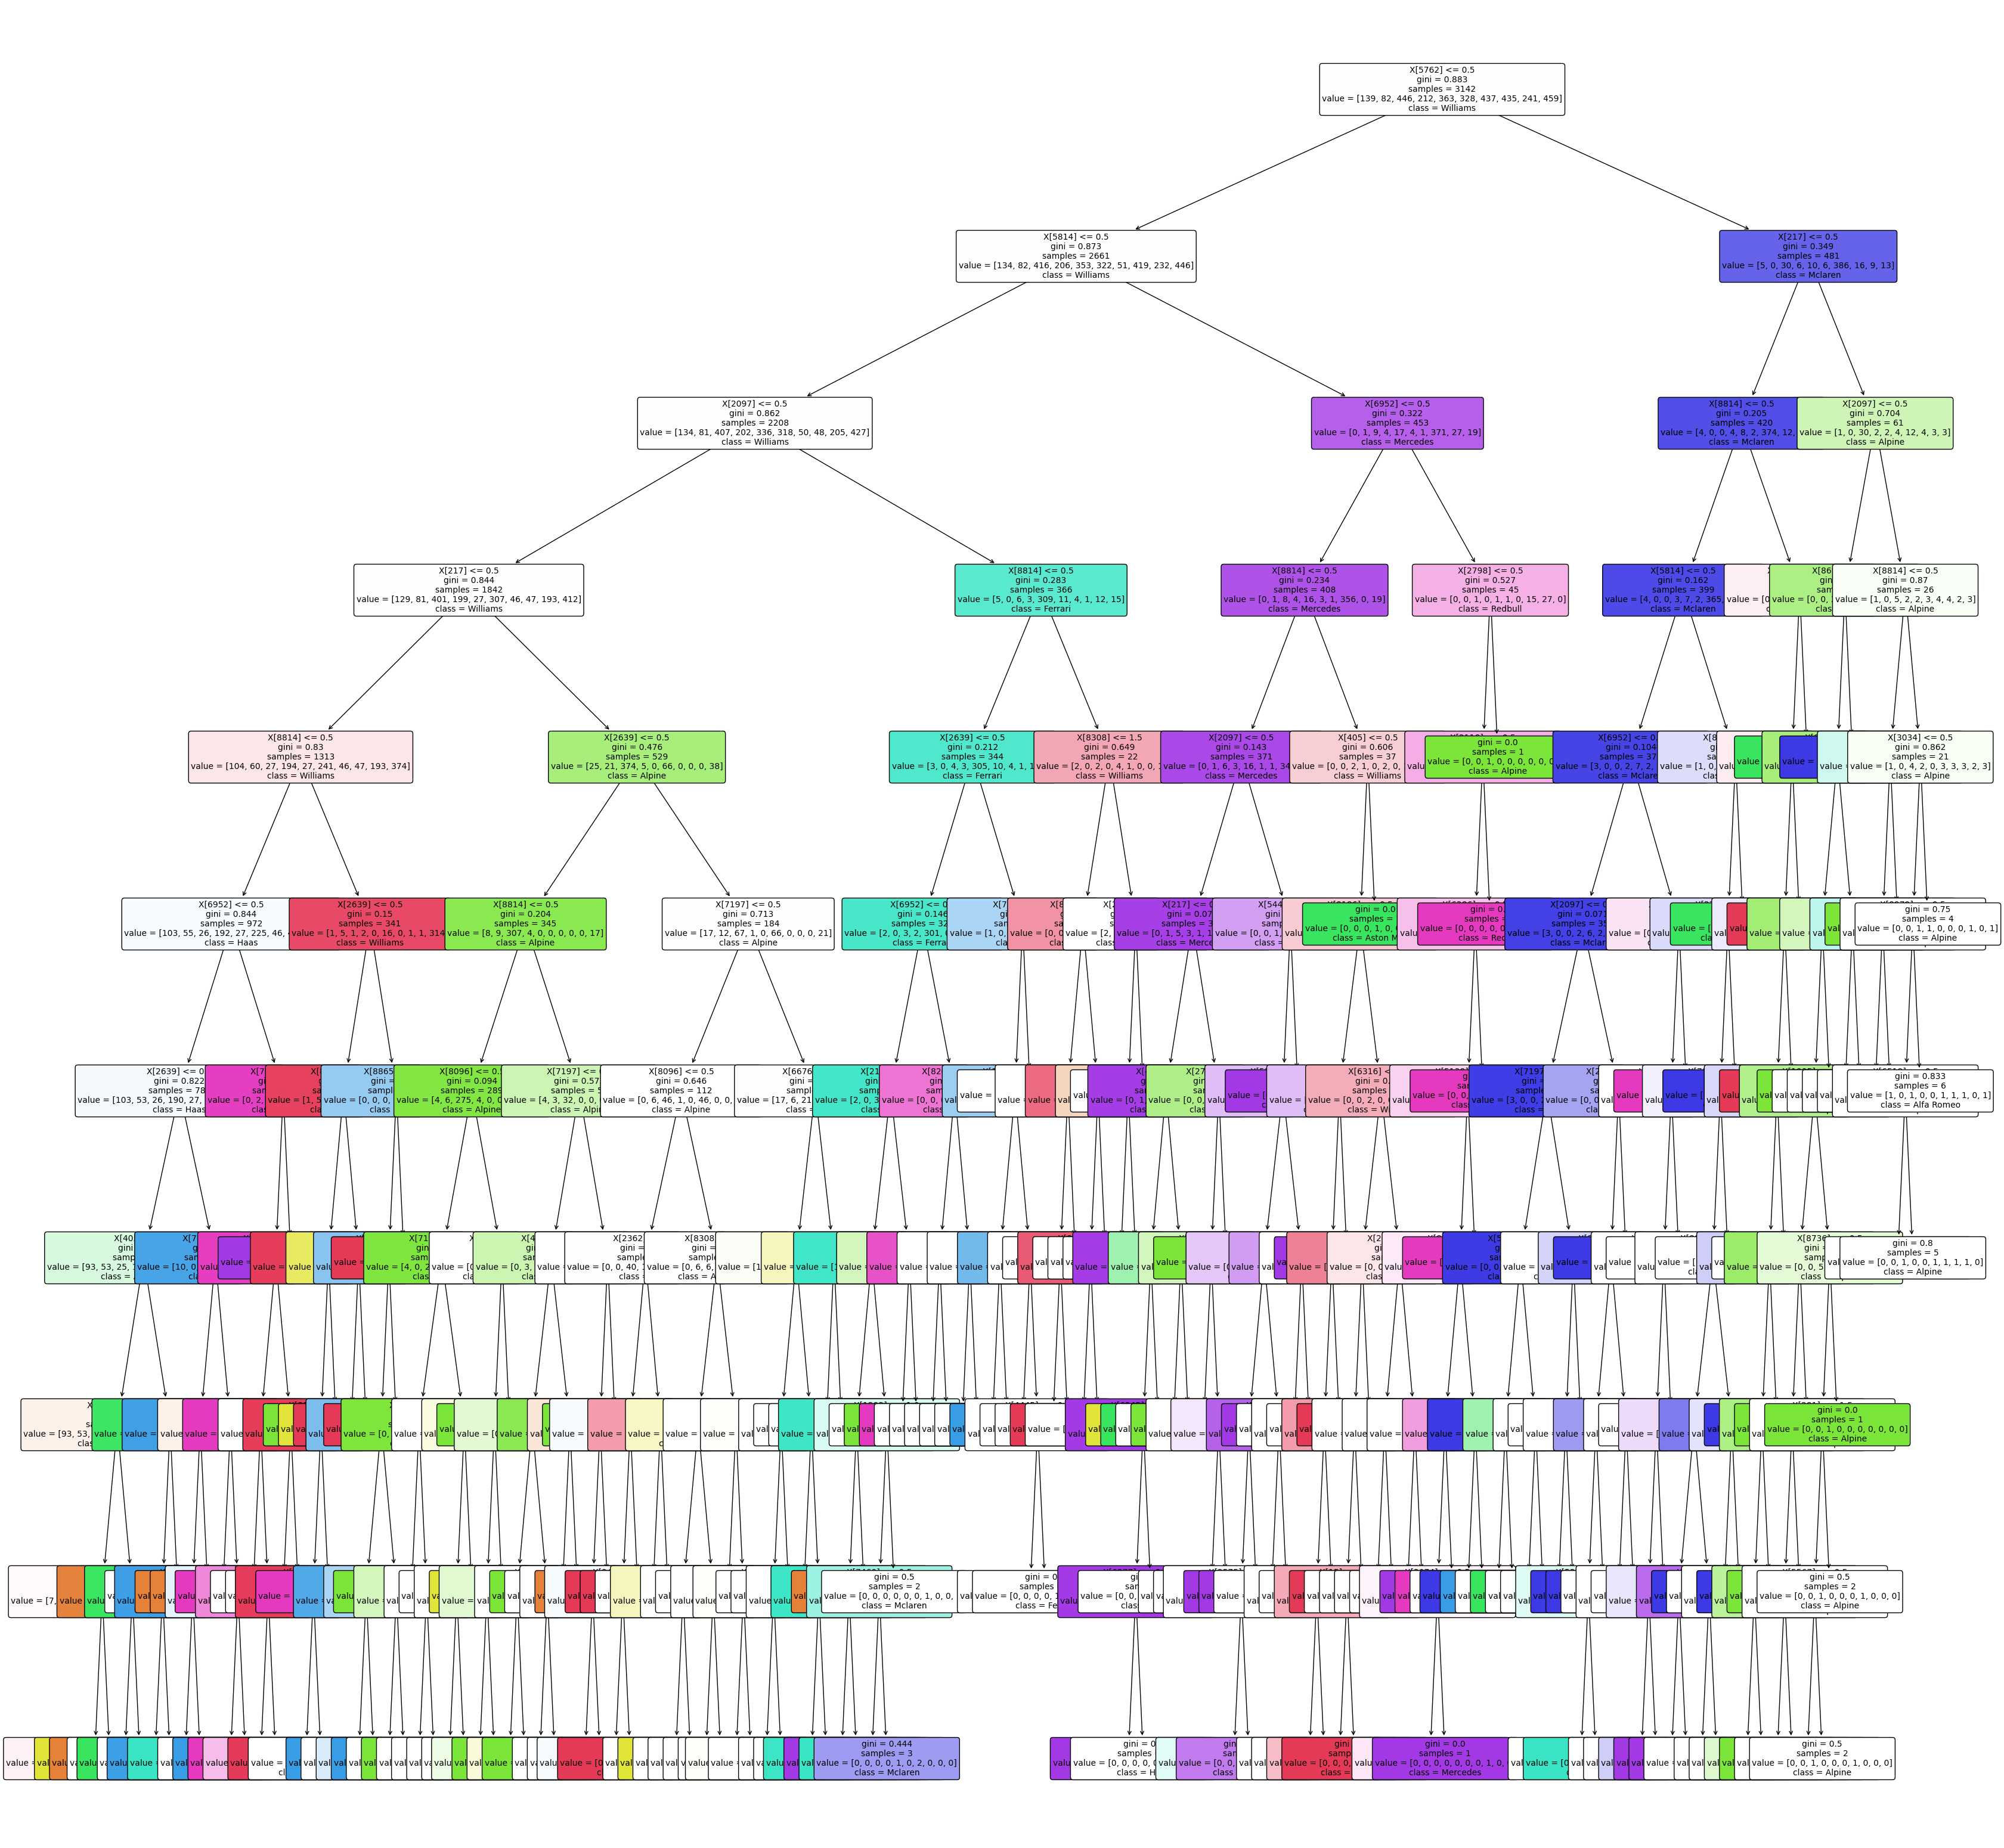

In [151]:
plt.figure(figsize = (40,40))
optimal_dec_tree = plot_tree(decision_tree=optimal_dt, class_names=label_list, filled=True, rounded=True, fontsize=10, max_depth=10)
#plt.savefig('dec_tree_4.png')

Classification report for Optimal Decision Tree:

Accuracy 0.7404580152671756
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        41
           1       0.48      0.58      0.53        24
           2       0.62      0.71      0.66        77
           3       0.98      0.75      0.85        55
           4       0.78      0.79      0.78        90
           5       0.78      0.67      0.72        91
           6       0.87      0.74      0.80       113
           7       0.83      0.69      0.75        99
           8       0.85      0.84      0.84        81
           9       0.58      0.78      0.67       115

    accuracy                           0.74       786
   macro avg       0.75      0.73      0.73       786
weighted avg       0.76      0.74      0.75       786



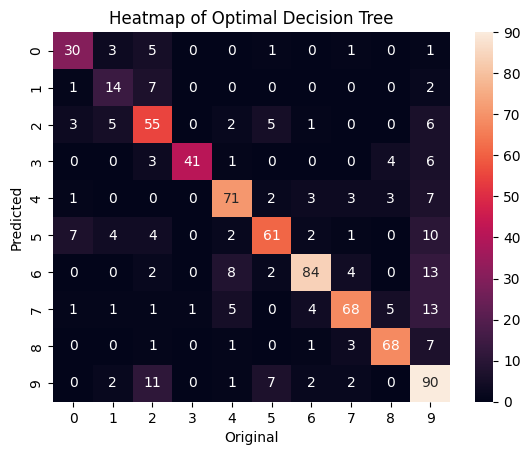

In [152]:
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Heatmap of Optimal Decision Tree')
#plt.savefig('Confusion_Matrix3.png')

#Accuracy
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## Conclusion
The accuracy and recall scores have increased to around 74% by changing our max_depth to 10 and criterion as gini with best splitter.